## Final Project: Data visualisation and analysis of social responsibilities of global warming in terms of CO2 emissions and average temperature

### _by Kathrine Schultz-Nielsen (s183929), David Ribberholt Ipsen (s164522), Hanlu He (s183909)_
---
_Course: 02806 - **Social data analysis and visualization spring 2022**_ <br>
_Course responsible: **Sune Lehmann Jørgensen**_ <br>
_DTU - **Technical University of Denmark**_
---

## Table of Contents:
- [__Part 1: Introduction and Motivation__](#1.)<br><br>
- [__Part 2: Dataset segmentation and cleaning__](#2.)<br><br>
- [__Part 3: Descriptive statistics about the dataset__](#3.)<br><br>
- [__Part 4: The apparent problem: The Earth is heating up__](#4.)<br><br>
- [__Part 5: What is Causing global warming?__](#5.)
    - [5.1. <u>Wealth (GDP)</u>](#5.1.)
    - [5.2. <u>Energy consumption</u>](#5.2.)
    - [5.3. <u>Population growth</u>](#5.3.)
    - [5.4. <u>(Urbanisation)</u>](#5.4.)
    - [5.5. <u>(Foreign investments)</u>](#5.5.)<br><br>
- [__Part 6: Who is responsible?__](#6.)<br><br>
- [__Part 7: Looking into the future__](#7.)
    - [7.1. <u></u>](#7.1.)
    - [7.2. <u></u>](#7.2.)<br><br>
- [__Part 8: Discussion__](#8.)<br><br>
- [__Part 9: Contributions__](#9.)<br><br>
---

<a id='1.'></a>
## 1. Introduction and Motivation

Global warming is no longer a problem we can look the other way and threat on the earth's ecosystem, subsequently our survival increases as we speak. CO2 emission is what most considers as the primary driver for climate change for its impact on increasing average temperature of the earth. The amount of atmospheric concentration of carbon dioxide has increased by 50% since the industrilisation era due to human activities \[1\]. With increasing living standards over the past decades were a result of us exploiting non-renewable enegry sources such as coal, oil and natural gas, lack of awareness of sustainable infrastructure design in urbanization processes and rapid population growth \[2\]. And we are already facing many of the consequences of global warming such as ice sheets melting, more frequent forest wildfires, rising sea level, more intense heat waves and appearence of more extreme temperatures \[3\]. These changes are esimtated to be irreversible even 1000 years after if we manage to stop CO2 emissions \[4\]. We have slowly came to realise the seriousenss of the issue and began drawing out plans to slow down the rising temperature. The paris agreement in 2015 is the largest agreement that binded 196 countries in the world to take actions against global warming, with the ambitious goal of limiting temperature increase to 1.5 degree celcius \[5\]. In this project we will be presenting the global warming trend with CO2 emissions and global recorded temperature data, assessing contribution of various social factors to CO2 emissions, dig deeper into nation-wise responsibilities for CO2 emissions and lastly looking into the future of temperature rise based on current climate change mitigation policies.

---

We will be working primarily with two datasets for this project, the [Our World in Data CO2 and Greenhouse Gas Emissions database](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions) and the [Climate Change: Earth Surface Temperature Data](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). The reason for choosing the two datasets is because to assess the impact of global warming interms of CO2 emissions and rising temperature requires extensive information in the geographical and time domain, as the matter concerns all of us no matter where we are from and comparison of the past to the present so we can look into the future. And the two datasets do exactly that, with: 

The _Our Wolrd in Data CO2 and Greenhouse Gas Emission database_ contains 21591 records of CO2 emissions and various relevant variables such as energy consumption, gdp, population, CO2 emissions by industrial sector etc. for 243 countries and regions with the earliest record from 1750 and newest from 2020. 

The _Climate Change: Earth Surface Temperature Data_ contains a collection data files with 8 million+ records of average temperature by cities and countries around the world. 

Therefore, we believe the two datasets compliments well with each other to provide us with sufficient information for our visualisations

---

<a id='2.'></a>
## 2. Dataset segmentation and cleaning

Before we delve into the deeper analysis of this project, let us import all the necessary libraries for this project:

In [2]:
# Basic libraries

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import itertools

import warnings
warnings.filterwarnings('ignore')

In [8]:
# helper 

import pycountry_convert as pc

def country_to_continent(country_code):
    try:
        country_alpha2 = pc.country_alpha3_to_country_alpha2(country_code)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except: 
        country_continent_name = country_code
        
    return country_continent_name

In [9]:
# Display libraries

from IPython.display import IFrame, display
from IPython.core.display import display as disp, HTML
from ipywidgets import widgets, interact, interactive, fixed, interact_manual

from plotly import __version__
import plotly.express as px
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
sns.set()

pio.renderers.default = 'notebook'

Now, we will proceed to filtering, subsetting and cleaning the original datasets
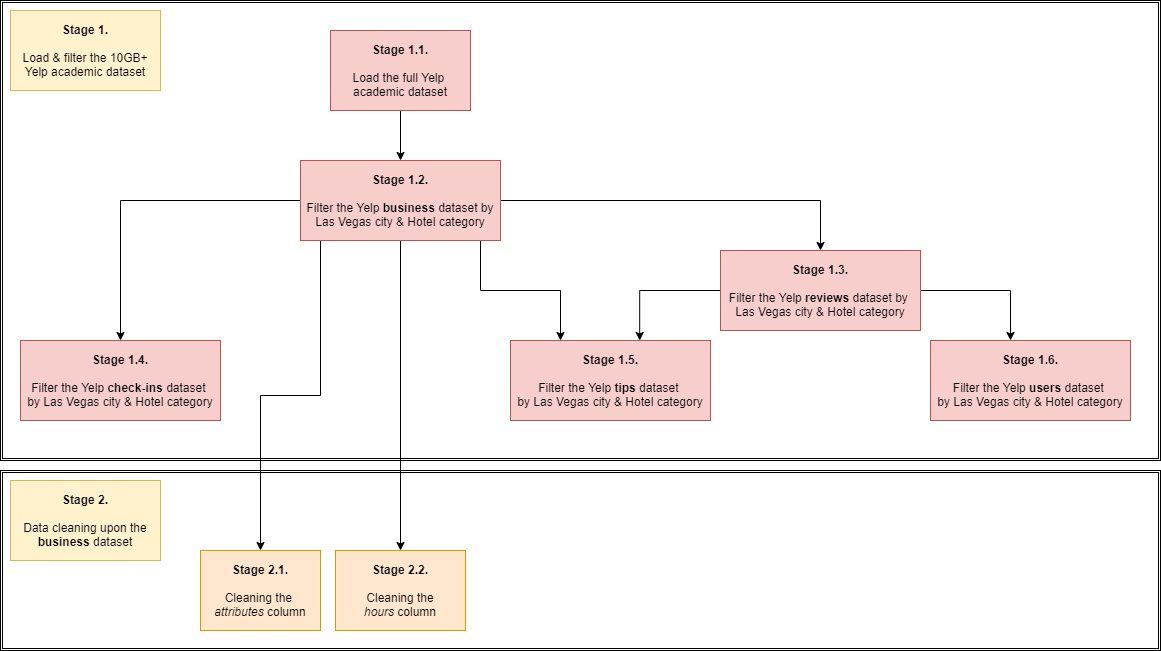

### Filtering & subsetting the full dataset

In [13]:
df_co2 = pd.read_csv('data/owid-co2-data.csv',sep = ',',encoding = 'unicode_escape')
df_co2

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


--- 
<a id='3.'></a>
## 3. Descriptive statistics about the dataset

After the full segmentation and cleaning has been performed, let us try to understand our dataset a little bit better. We will afterwards jump into the __Text Analytics__ part for finding important top business keywords, so it is important to know how large a  scale does our analysis have to deal with.

In [15]:
df_co2

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,47.5,3385.574,1.889
25187,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,NaN,NaN,NaN
25188,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,NaN,NaN,NaN
25189,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


--- 
<a id='4.'></a>
## 4. The apparent problem: The Earth is heating up

--- 
<a id='5.'></a>
## 5.  What is Causing global warming?

<a id='5.1.'></a>
### 5.1. Population growth

It is more than apparent that the world population is constantly growing, yet the resources on earth does not grow with it. Every life that comes to join the big party has demand for food, shelter, clothing, and due to advancement in technology and living standards, the list has now become extensive with Mcdonalds to michellin star, straw roof to golden roof, cheap fast fashion to luxury clothing, iphone 13 and its dupes, scooters to ferarris etc. All that demands is shouting production, production and production! Which inevitably increases fossil fuel burning and thereby CO2 emissions. It has been found that 1% of population growth mounts to 1.28% increase in average CO2 emission and thereby, results in global warming \[6\].

<a id='5.2.'></a>
### 5.2. Energy consumption

<a id='5.3.'></a>
### 5.3. Urbanisation

<a id='5.4.'></a>
### 5.4. Wealth (GDP)

<a id='5.5.'></a>
### 5.5. Foreign investments

--- 
<a id='6.'></a>
## 6. Who takes the responsibility?

--- 
<a id='7.'></a>
## 7. Looking into the future

<a id='7.1.'></a>
### 7.1. Finding trends

<a id='8.'></a>
## 8. Discussion

## References

<div class="csl-entry">[1] <i>Carbon Dioxide | Vital Signs – Climate Change: Vital Signs of the Planet</i>. (n.d.). Retrieved May 3, 2022, from https://climate.nasa.gov/vital-signs/carbon-dioxide/</div>

<div class="csl-entry">[2] Ali, K. A., Ahmad, M. I., &#38; Yusup, Y. (2020). Issues, Impacts, and Mitigations of Carbon Dioxide Emissions in the Building Sector. <i>Sustainability 2020, Vol. 12, Page 7427</i>, <i>12</i>(18), 7427. https://doi.org/10.3390/SU12187427</div>

<div class="csl-entry">[3] <i>Effects | Facts – Climate Change: Vital Signs of the Planet</i>. (n.d.). Retrieved May 3, 2022, from https://climate.nasa.gov/effects/</div>

<div class="csl-entry">[4] Solomon, S., Plattner, G. K., Knutti, R., &#38; Friedlingstein, P. (2009). Irreversible climate change due to carbon dioxide emissions. <i>Proceedings of the National Academy of Sciences of the United States of America</i>, <i>106</i>(6), 1704–1709. https://doi.org/10.1073/PNAS.0812721106/SUPPL_FILE/0812721106SI.PDF</div>

<div class="csl-entry">[5] <i>The Paris Agreement | UNFCCC</i>. (n.d.). Retrieved May 3, 2022, from https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement</div>

<a id='9.'></a>
## 9. Contributions

- _Website creation and setup: **Hanlu**_

- _Part 1: Introduction and Motivation: ****_

- _Part 2: Dataset segmentation and cleaning: ****_

- _Part 3: Descriptive statistics about the dataset: ****_

- _Part 4: Keyword detection using TF-IDF: ****_

- _Part 5: Network Analysis upon the Yelp hotel dataset: ****_

- _Part 6: Topic detection using LDA: ****_

- _Part 7: Sentiment Analysis upon the hotel reviews: ****_

- _Part 8: Discussion: ****_